<hr style="border:2px solid black">

# Question 1
### Plot histograms of the continous variables (box, budget, starpwr) to see if any transformations are needed. Are any of them skewed? Apply a log-transformation to all the skewed variables.

<hr style="border:1px solid black">

1.1. Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

1.2. Load dataset with pandas

In [2]:
os.chdir('/Users/carolinajaime')
og_df = pd.read_csv('/Users/carolinajaime/Downloads/boxOffice.csv')

1.3. Arrange histograms side by side, add titles. 

Text(0.5, 1.0, 'Starpower')

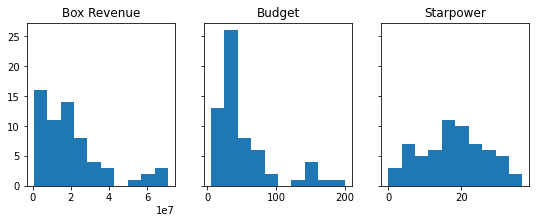

In [3]:
#create a grid 1x3 to align all three histograms. 
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
#place each histogram, with corresponding titles.
axs[0].hist(og_df['box'])
axs[0].set_title("Box Revenue")
axs[1].hist(og_df['budget'])
axs[1].set_title("Budget")
axs[2].hist(og_df['starpowr'])
axs[2].set_title("Starpower")

Starpower appears to be normally distributed. 
However, both budget and box are positively skewed, with outliers to their right. We will apply a logarithmic scale to Box Revenue and Budget to create a relatively more normally distributed histogram. 

1.4. Apply log scale to Box Revenue and Budget using Numpy. 

In [4]:
#create a copy of the raw data (og_data)
l_df = og_df.copy()
#log. transofrm box and budget
l_df['box'] = np.log(l_df['box'])
l_df['budget'] = np.log(l_df['budget'])

1.5. Plot histograms of final versions of variables: Box Revenue (log) , Budget (log) & Starpower.

Text(0.5, 1.0, 'Starpower')

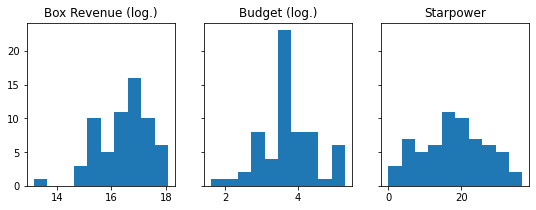

In [5]:
#create a grid 1x3 to align all three histograms. 
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
#place each histogram, with corresponding titles. Note the (log.) note for transformed variables. 
axs[0].hist(l_df['box'])
axs[0].set_title("Box Revenue (log.)")
axs[1].hist(l_df['budget'])
axs[1].set_title("Budget (log.)")
axs[2].hist(l_df['starpowr'])
axs[2].set_title("Starpower")

All three variables (Box Revenue, Budget, Starpower) now appear to have relatively normal distributions.

<hr style="border:2px solid black">

# Question 2
### Run a linear regression of box office revenues on the “traditional” variables (i.e., using all the independent variables (except the “buzz” variables). If any variables were transformed, be sure to use the transformed versions of those variables. What are the R2 and adjusted-R2 values? Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (P>|t|)?

<hr style="border:1px solid black">

2.1. Lay out dependent and independent variables for regression.

In [6]:
#determine dependent variable Box as y. Utilize the dataset that holds the transformed variables (l_data).
y = l_df['box']
#create copy of l_data, named X. X will hold ONLY the "traditional" variables.
X = l_df.copy()
#drop the columns of non-traditional variables, and of the dependent variable.
X = X.drop(['box', 'addict','cmngsoon', 'fandango', 'cntwait3'], axis =1)
#add constant =1
X['const'] = 1.0

2.2. Run regression #1

In [7]:
#run regression
linregr1 = sm.OLS(y, X).fit()
#print regression results
print(linregr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Sun, 11 Sep 2022   Prob (F-statistic):             0.0109
Time:                        19:55:28   Log-Likelihood:                -70.832
No. Observations:                  62   AIC:                             163.7
Df Residuals:                      51   BIC:                             187.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              0.2524      0.692      0.365      0.7

2.3. Results

In Regression #1, we found that R-square = 0.342 and Adj. R-square = 0.214. We found that the variables that were significant at the 0.10 level were: 
-	Budget, where P-value = 0.001 < 0.10
-	Sequel, where P-value = 0.058 < 0.10
-	Horror, where P-value = 0.024 < 0.10

<hr style="border:2px solid black">

# Question 3
###  Run another linear regression using only the variables that were significant (again, ignoring the “buzz” variables). What are the R2 and adjusted-R2 values? Are all the variables still significant at the 0.10 level?

<hr style="border:1px solid black">

3.1 Create a copy of dataset

In [8]:
#create copy of dataset, where we will store variable: Budget, Sequel, Horror.
X1=X.copy()
#drop insignificant variables
X1=X1.drop(['G','PG','PG13','starpowr','action','comedy','animated'], axis=1)

3.2. Run Regression #2

In [9]:
#run regression
linregr2 = sm.OLS(y, X1).fit()
print(linregr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           0.000162
Time:                        19:55:28   Log-Likelihood:                -73.175
No. Observations:                  62   AIC:                             154.4
Df Residuals:                      58   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         0.6568      0.159      4.124      0.0

3.3. Results

In Regression #2, we found that R-square = 0.291 and Adj. R-square = 0.254. We found that the variables that were significant at the 0.10 level were: 
-	Budget, where P-value = 0.000 < 0.10
-	Horror, where P-value = 0.013 < 0.10
-	Sequel, where P-value = 0.099 < 0.10

<hr style="border:2px solid black">

# Question 4
### Plot histograms of the four “buzz” variables. Are any of them skewed? Apply a log-transformation to all the skewed variables.

<hr style="border:1px solid black">

4.1. Arrange histograms side by side, add titles. 

Text(0.5, 1.0, 'Cntwait3')

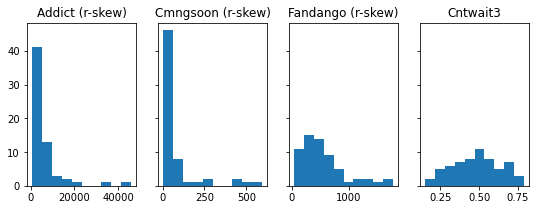

In [10]:
#create a grid 1x4 to align all three histograms. 
fig, axs = plt.subplots(1, 4, figsize=(9, 3), sharey=True)
#place each histogram, with corresponding titles. Note the (log.) note for transformed variables. 
axs[0].hist(og_df['addict'])
axs[0].set_title("Addict (r-skew)") #right skewed
axs[1].hist(og_df['cmngsoon'])
axs[1].set_title("Cmngsoon (r-skew)") #right skewed
axs[2].hist(og_df['fandango'])
axs[2].set_title("Fandango (r-skew)") #right skewed
axs[3].hist(og_df['cntwait3'])
axs[3].set_title("Cntwait3") #normal distribution

Cntwait3 appears to be normally distributed. 
However, addict, cmngsoon and fandango are positively skewed, with outliers to their right. We will apply a logarithmic scale to addict, cmngsoon and fandango to create a more normally distributed histogram. 

4.2. Apply log scale to Addict, Cmngsoon and Fandango using Numpy. 

In [11]:
#create new dataframe for lbuzz
lbuzz_df=l_df.copy()
#Transform addict, cmngsoon, and Fandango
lbuzz_df['addict'] = np.log(lbuzz_df['addict'])
lbuzz_df['cmngsoon'] = np.log(lbuzz_df['cmngsoon'])
lbuzz_df['fandango'] = np.log(lbuzz_df['fandango'])

4.3. Plot histograms of final versions of variables: Box Revenue (log) , Budget (log) & Starpower.

Text(0.5, 1.0, 'Cntwait3')

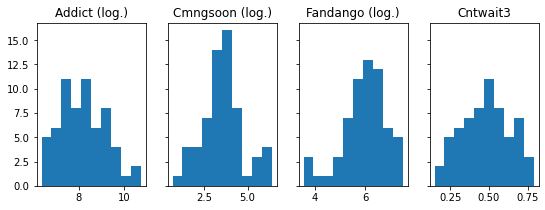

In [12]:
#create a grid 1x4 to align all three histograms. 
fig, axs = plt.subplots(1, 4, figsize=(9, 3), sharey=True)
#place each histogram, with corresponding titles. Note the (log.) note for transformed variables. 
axs[0].hist(lbuzz_df['addict'])
axs[0].set_title("Addict (log.)") #right skewed
axs[1].hist(lbuzz_df['cmngsoon'])
axs[1].set_title("Cmngsoon (log.)") #right skewed
axs[2].hist(lbuzz_df['fandango'])
axs[2].set_title("Fandango (log.)") #right skewed
axs[3].hist(lbuzz_df['cntwait3'])
axs[3].set_title("Cntwait3") #normal distribution

All buzz variables now appear to have relatively normal distributions.

<hr style="border:2px solid black">

# Question 5
### Run a linear regression of box office revenues on all the independent variables (transformed as needed). What are the R2 and adjusted-R2 values? Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (P>|t|)?

<hr style="border:1px solid black">

5.1 Prepare dataset before running regression

In [13]:
#first, let's make a copy of the dataset with all the log transformations
logdf=lbuzz_df.copy()

In [14]:
#drop only dependent variable from df
logdf=logdf.drop(['box'], axis=1)
logdf['const']=1

5.2. Run Regression #3

In [15]:
#run the regression 
linregr3 = sm.OLS(y, logdf).fit()
print(linregr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           3.77e-06
Time:                        19:55:29   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              0.6375      0.600      1.063      0.2

In Regression #3, we found that R-square = 0.624 and Adj. R-square = 0.512. We found that the variables that were statistically significant at the 0.10 level were: 
-	PG, where P-value = 0.069 < 0.10
-	Addict, where P-value = 0.039 < 0.10
-	Cntwait3, where P-value = 0.002 < 0.10
-	Action, where P-value = 0.007 < 0.10
-	Animated, where P-value = 0.046 < 0.10

<hr style="border:2px solid black">

# Question 6
### Run another linear regression using only the variables that were significant. What are the R2 and adjusted-R2 values? Are all the variables still significant at the 0.10 level?

<hr style="border:1px solid black">

6.1 Prepare dataframe before running Regression

In [16]:
logdf1=logdf.copy()
logdf1=logdf1.drop(['G','PG13','budget','starpowr','sequel','comedy','horror','cmngsoon','fandango'], axis=1)

6.2 Run Regression #4

In [17]:
linregr4 = sm.OLS(y, logdf1).fit()
print(linregr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           6.06e-09
Time:                        19:55:29   Log-Likelihood:                -58.512
No. Observations:                  62   AIC:                             129.0
Df Residuals:                      56   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PG             0.3464      0.228      1.519      0.1

6.3 Results

In Regression #4, we found that R-square = 0.558 and Adj. R-square = 0.519. We found that the variables that were statistically significant at the 0.10 level were: 
-	Action, where P-value = 0.005 < 0.10
-	Animated, where P-value = 0.096 < 0.10
-	Addict, where P-value = 0.010 < 0.10
-	Cntwait3, where P-value = 0.000 < 0.10
Unfortunately, PG was no longer significant at the 0.10 level. 

<hr style="border:2px solid black">

# Question 7
### Compare the models developed so far – which of these would you choose, and why?

<hr style="border:1px solid black">

Regression #4 from Q6 appears to be the best model so far, as it provides us with the highest Adj. R-square (0.519).

<hr style="border:2px solid black">

# Question 8
### Apply Principal Component Analysis to just the 4 “buzz” variables. If you transformed any of them, make sure you use the transformed versions. Also make sure that you standardize the variables first. What are the eigen values associated with each component? What fraction of the variance is explained by each component? How many principal components are selected using Kaiser’s Rule, and using “explained variance” thresholds of 60%, 70%, 80% and 90%?

<hr style="border:1px solid black">

8.1. Create a copy of the dataframe and keep only buzz variables

In [18]:
buzzdf=lbuzz_df.copy()
buzzdf=buzzdf.drop(['box','G','PG','PG13','budget','sequel','starpowr','action','comedy','animated','horror'], axis=1)

8.2. Standardize the data

In [19]:
#standardize the data
sc = prep.StandardScaler()
sX = pd.DataFrame(sc.fit_transform(buzzdf), columns = buzzdf.columns)
# StandardScaler uses the population variance/standard deviation
# calculate the sample standard deviation of the result and scale by dividing with it 
sc.scale_ = np.std(sX, axis=0, ddof=1).to_list()
#print(sc.scale_)
sX = sX/sc.scale_

8.3. Transform with PCA

In [20]:
#create pca object
#not specifying the number of components results in all variables being used
pca4 = PCA()
#pass the feature set 
#fit calculates parameters; transform applies the transformation
pcs4 = pca4.fit_transform(sX)

8.4. Calculate Eigen Values

In [21]:
print('\nEigen Values of Correlation Matrix')
print(pca4.explained_variance_)


Eigen Values of Correlation Matrix
[2.41420026 0.77519959 0.45214886 0.3584513 ]


8.5. Calculate Explained Variance

In [22]:
expldvarpca4 = pca4.explained_variance_ratio_
expldvarpca4

array([0.60355006, 0.1937999 , 0.11303721, 0.08961282])

8.6. Calculate Cumulative Explained Variance

In [23]:
expldvarsum4 = np.cumsum(expldvarpca4)
print('\nCumulative sum of the explained variance')
print(expldvarsum4)


Cumulative sum of the explained variance
[0.60355006 0.79734996 0.91038718 1.        ]


8.7. Kaiser's value
PC1 has an Eigenvalue = 2.445>1

8.8. Thresholds for % of cumulative variance
8.8.1. 60% -- PC1 satisfy this threshold.

8.8.2. 70% -- PC1 & PC2 satisfy this threshold.

8.8.3. 80% & 90% (same) -- PC1 & PC2 & PC3 satisfy this threshold.

8.9. Create dataframe containing PCA values

In [24]:
pcs4df = pd.DataFrame(pcs4, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
print(pcs4df) 

         PC1       PC2       PC3       PC4
0  -0.591216  1.120419 -0.739575  0.994585
1   1.615992  0.286131  0.763648  1.010510
2  -1.644376  0.055875  0.700252 -0.432820
3   2.806445 -0.742427 -0.229837  0.737825
4   0.662450 -1.017549 -0.274396  0.350745
..       ...       ...       ...       ...
57  1.745896  0.049794  0.073061  0.625717
58 -0.144094  2.643883  1.190069 -0.034036
59  0.695724  1.874180 -0.769292  0.163062
60  2.973264  0.158961  0.468080 -0.692292
61 -0.003581  0.489791 -0.728942  0.402951

[62 rows x 4 columns]


<hr style="border:2px solid black">

# Question 9
### Run a linear regression using all the “traditional” independent variables (if transformed, use the transformed versions) and all 4 principal components (the only variables you should not use here are the four “buzz” variables). What are the R2 and adjusted-R2 values? Which variables (if any) are significant at the 0.10 level? In particular, are any of the principal components significant? What can you say about this model vis-a-vis the other models built so far?

<hr style="border:1px solid black">

9.1. Join logdf with pc4df, remove box (dependent variable)

In [25]:
df2 = pd.concat([logdf, pcs4df], axis=1)
df2=df2.drop(['addict','cmngsoon','fandango','cntwait3'], axis=1)

9.2. Run Regression #5

In [26]:
linregr5 = sm.OLS(y, df2).fit()
print(linregr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           3.77e-06
Time:                        19:55:31   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              0.6375      0.600      1.063      0.2

9.3. Results

In Regression #5, we found that R-square = 0.624 and Adj. R-square = 0.512. We found that the variables that were statistically significant at the 0.10 level were: 
-	PG, where P-value = 0.062 < 0.10
-	Action, where P-value = 0.007 < 0.10
-	Animated, where P-value = 0.046 < 0.10
-	PC1, where P-value = 0.000 < 0.10

<hr style="border:2px solid black">

# Question 10
### Now run regressions using the number of principal components based on Kaiser’s Rule and “explained variance” thresholds of 60%, 70%, 80% and 90% (if any of the models are identical, point this out and run it only once). Compare all the regression models involving the principal components (including the one involving all four components). Which of these would you recommend, and why?

<hr style="border:1px solid black">

10.1. Run Regression 10. 
Kaiser's Rule (aka only PCA 1) + explained variance, threshold = 60% (aka only PCA 1)

In [27]:
df3=df2.copy()

In [28]:
df3=df3.drop(['PC2','PC3','PC4'], axis=1)

In [29]:
linregr6 = sm.OLS(y, df3).fit()
print(linregr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.510
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           1.39e-06
Time:                        19:55:31   Log-Likelihood:                -56.278
No. Observations:                  62   AIC:                             136.6
Df Residuals:                      50   BIC:                             162.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              0.3844      0.553      0.695      0.4

10.2. Run Regression #7

Explained variance, threshold = 70% (aka PCA 1 & 2)

In [30]:
df4=df2.copy()

df4=df4.drop(['PC3','PC4'], axis=1)

In [31]:
linregr7 = sm.OLS(y, df4).fit()
print(linregr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     6.357
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           1.27e-06
Time:                        19:55:31   Log-Likelihood:                -54.729
No. Observations:                  62   AIC:                             135.5
Df Residuals:                      49   BIC:                             163.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              0.4933      0.549      0.898      0.3

10.3. Run Regression #8

Explained variance, threshold = 80% & 90% (aka PCA 1, 2 & 3)

In [32]:
df5=df2.copy()
df5=df5.drop(['PC4'], axis=1)

In [33]:
linregr8 = sm.OLS(y, df5).fit()
print(linregr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           3.32e-06
Time:                        19:55:31   Log-Likelihood:                -54.715
No. Observations:                  62   AIC:                             137.4
Df Residuals:                      48   BIC:                             167.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              0.4635      0.592      0.783      0.4

We would recommend Regression #7 because it has the highest Adj. R-square at 0.513 and only includes PC1 and PC2.

<hr style="border:2px solid black">

# Question 11
### Now apply Principal Component Analysis to the 4 “buzz” variables and the other continuous variables (budget and starpowr). Again, use transformed versions of the variables if any were transformed and standardize the variables first. What are the eigen values associated with each component? How many principal components are selected using Kaiser’s Rule, and using “explained variance” thresholds of 60%, 70%, 80% and 90%?

<hr style="border:1px solid black">

11.1. Prepare dataframe for PCA

In [34]:
df6=lbuzz_df.copy()
df6=df6.drop(['box','G','PG','PG13','sequel','action','comedy','animated','horror'], axis=1)

11.2. Standardize the data

In [35]:
#standardize the data
sc = prep.StandardScaler()
sX = pd.DataFrame(sc.fit_transform(df6), columns = df6.columns)
# StandardScaler uses the population variance/standard deviation
# calculate the sample standard deviation of the result and scale by dividing with it 
sc.scale_ = np.std(sX, axis=0, ddof=1).to_list()
#print(sc.scale_)
sX = sX/sc.scale_

11.3. Perform PCA

In [36]:
# create pca object
# not specifying the number of components results in all variables being used
pca6 = PCA()
#pass the feature set 
# fit calculates parameters; transform applies the transformation
pcs6 = pca6.fit_transform(sX)

11.4. Eigen Values

In [37]:
print('\nEigen Values of Correlation Matrix')
print(pca6.explained_variance_)


Eigen Values of Correlation Matrix
[2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273 ]


11.5. Explained Variance

In [38]:
expldvarpca6 = pca6.explained_variance_ratio_
expldvarpca6

array([0.47303897, 0.24240445, 0.11705369, 0.07383216, 0.05674951,
       0.03692122])

11.6. Cumulative Explained Variance

In [39]:
expldvarsum6 = np.cumsum(expldvarpca6)
print('\nCumulative sum of the explained variance')
print(expldvarsum6)


Cumulative sum of the explained variance
[0.47303897 0.71544342 0.83249711 0.90632927 0.96307878 1.        ]


11.7. Create dataframe for PCA values

In [40]:
pcs6df = pd.DataFrame(pcs6, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])
print(pcs6df) 

         PC1       PC2       PC3       PC4       PC5       PC6
0   0.727800  0.038162  1.204158  1.123466 -0.117357 -0.448392
1  -2.637946 -1.370233  1.077239 -0.251879  0.013417 -0.366720
2   1.542932 -0.469245  0.076520 -0.857879  0.278870  0.224304
3  -3.605130 -0.458782 -0.388755  0.345631  0.690654 -0.445240
4  -1.453419 -0.892621 -0.777003  0.150703  1.127304 -0.218117
..       ...       ...       ...       ...       ...       ...
57 -2.870020 -1.454298  0.723402  0.275331  0.139703  0.201002
58  1.015619  2.049672  2.170410 -1.181606  0.225858 -0.428071
59  0.412522  2.404608  1.172586  0.762127 -0.042936 -0.285026
60 -2.919339  1.181531 -0.091520 -0.711417  0.114676  0.378143
61  0.933144  1.094761  0.242295  1.012984 -1.199726 -0.388103

[62 rows x 6 columns]


11.8. Kaiser's Rule & Explained Variance Threshold = 60% & = 70%

PC1 PC2

11.9. Explained variance threshold = 80%

PC1 PC2 PC3

11.10. Explained variance threshold = 90%

PC1 PC2 PC3 PC4

<hr style="border:1px solid black">

# Question 12
### Next, run regressions using the number of principal components based on Kaiser’s Rule and “explained variance” thresholds of 60%, 70% , 80% and 90%. Compare these regression models and explain which one you would recommend, and why?

<hr style="border:1px solid black">

12.1. Kaiser's Rule & Explained Variance Threshold = 60% & = 70%

(PC1 PC2)

In [41]:
#create new df
df7=pcs6df.copy()
df8=logdf.copy()

In [42]:
#add PCA dataframe to main df
df9 = pd.concat([df8, df7], axis=1)

12.1.1. Run Regression #9

In [43]:
df10=df9.copy()
df10=df9.drop(['budget','starpowr','addict','cmngsoon','fandango','cntwait3','G','PG','PG13','sequel','action','comedy','animated','horror','PC3','PC4','PC5','PC6'],axis=1)
linregr9 = sm.OLS(y, df10).fit()
print(linregr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     22.31
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           6.10e-08
Time:                        19:55:32   Log-Likelihood:                -66.372
No. Observations:                  62   AIC:                             138.7
Df Residuals:                      59   BIC:                             145.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.092    179.349      0.0

12.2. Explained Variance Threshold = 80%

(PC1 PC2 PC3)

12.2.1. Run Regression #10

In [44]:
df11=df9.copy()
df11=df11.drop(['G','PG','PG13','sequel','action','comedy','animated','horror','budget','starpowr','addict','cmngsoon','fandango','cntwait3','PC4','PC5','PC6'],axis=1)
linregr10 = sm.OLS(y, df11).fit()
print(linregr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.72
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           1.35e-07
Time:                        19:55:32   Log-Likelihood:                -65.385
No. Observations:                  62   AIC:                             138.8
Df Residuals:                      58   BIC:                             147.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.091    180.676      0.0

12.3. Explained Variance Threshold = 90%

(PC1 PC2 PC3 PC4)

12.3.1. Run Regression #11

In [45]:
df12=df9.copy()
df12=df12.drop(['budget','G','PG','PG13','sequel','action','comedy','animated','horror','starpowr','addict','cmngsoon','fandango','cntwait3','PC5','PC6'],axis=1)
linregr11 = sm.OLS(y, df12).fit()
print(linregr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     11.69
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           5.34e-07
Time:                        19:55:32   Log-Likelihood:                -65.262
No. Observations:                  62   AIC:                             140.5
Df Residuals:                      57   BIC:                             151.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.092    179.467      0.0

We believe that the Regression #10 is the best model because it has the highest Adj. R-Square and includes only PC1, PC2 and PC3.

<hr style="border:1px solid black">

# Question 13
### Are the “buzz” variables helping build a better model? How about PCA?

<hr style="border:1px solid black">

13.1. Impact of Buzz Variables on models

To determine whether buzz variables have helped build a better model, we will compare Regression 1 to Regression 3. Regression 1 excluded buzz variables, while Regression 3 did not. The results show that R-square and Adj. R-square almost doubled from Regression 1 to Regression 3. Furthermore, we found more statistically significant variables when we included buzz variables. Hence, we can conclude that buzz variables have helped us build better models. 

13.2. Run Regression #12 to properly assess the impact of PCA.

In [46]:
df13=logdf.copy()
df13=df13.drop(['G','PG','PG13','sequel','action','comedy','animated','horror'],axis=1)

In [47]:
linregr12 = sm.OLS(y, df13).fit()
print(linregr12.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     8.291
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           2.07e-06
Time:                        19:55:32   Log-Likelihood:                -63.859
No. Observations:                  62   AIC:                             141.7
Df Residuals:                      55   BIC:                             156.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         0.0647      0.182      0.355      0.7

To determine whether performing PCA has helped us build a better model, we will compare Regression #3 (which used the buzz variables) and Regression #7 (which is the best model after we performed PCA on the buzz variables). We will also compare Regression #10 (which is the best model after we performed PCA on 6 variables) to Regression #12 (which used the same 6 variables we converted). In both cases, we can see that Adjusted R-square is higher when we performed PCA and chose the best model than when we simply used the raw variables. Hence, we can conclude that using PCA has helped us build better models. 

<hr style="border:1px solid black">

# Question 14
### Did you learn anything surprising while doing these analyses? Can you provide some managerial takeaways?

<hr style="border:1px solid black">

In terms of the techniques used, these analyses allowed us to witness the impact that PCA can have in regression models. For instance, it was surprising the effect that different thresholds for Principal Component Selection can have. We found that, often, the optimal model was neither the most restrictive one (meaning that we would impose the strictest thresholds) nor the one that included the most number of PCs, but somewhere in the middle. Hence, testing different thresholds was key to finding our optimal models. 

In terms of the managerial insights we can learn from this exercise, we found that a few variables had consistent effects when predicting Box Revenue for a film. First, we found that buzz variables were very important predictors for the box revenue. While we first believed that budget and starpowr would be key drivers of revenue at the beginning of the analysis, these variables became less and less significant as we dove into the models performed. Finally, we found that the genre of the film was also a key driver as these variables stayed statistically significant throughout our analysis. Hence, we can argue that some genres are more likely to perform well than others. For instance, Action and Animated (as genres) are likely to decrease Box Revenue due to their negative coefficients, while PG is likely to increase revenue. 